<a href="https://colab.research.google.com/github/decoz/mlclass/blob/master/9_pythorch_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as tc

# NN 모듈 

앞에서는 Autograd 와 Optimizer 를 활용해 간단한 회귀문제를 해결하는 방법을 보았다.  Optimizer 를 사용하면 일일이 웨이트와 바이어스 값을 업데이트 해야하는 과정이 단순화되지만 그럼에도 다층 신경망처럼 복잡한 구조의 신경망에서는 다차원 배열로 전파과정을 만들어주는 것이 초보자에겐 쉽지 안다. 

이런 번거로움을 줄이기 위해서 입력값-> 출력값의 계산과정을 단순화 시켜줄 수 있게 많이 사용하는 신경망의 구조와 계산을 클래스화 시켜둔 것이 nn 라이브러리이다. 





In [81]:
import torch.nn as nn

## NN 모듈로 단순 선형회귀 제작

그러면 이제 nn모듈이 어떤 식으로 이 과정을 단순화 시켰는지 한번 알아보자. 단순 선형회귀 문제를 bias 까지 포함해 한번 보도록 하겠다. 



In [93]:
# 데이터 초기화 
xn = np.arange(10).reshape(-1,1)
yn = xn * 2 + 4 + np.random.normal(0,0.3,10)

x = tc.FloatTensor(xn)
y = tc.FloatTensor(yn)


### 기존의 선형회귀 방식 

먼저 이를 위해 이전챕터에서 구현한 단순 선형회귀 모델을 먼저 보도록 하겠다. 

In [88]:
# 파라미터 생성
w = tc.rand(1, requires_grad = True)
b = tc.rand(1, requires_grad = True)

# 옵티마이저 생성
optimizer = optim.SGD([w,b], lr = 0.01)

for step in range(1000):
  o = w * x + b  # 출력 계산
  d = ( y - o ).pow(2).mean() # 에러 계산

  optimizer.zero_grad()
  d.backward()
  optimizer.step() 

  if step % 100 == 0 : 
    print("w:{:.3f} err:{:.3f}".format(w.item(), d.item()) )



w:1.741 err:91.382
w:2.254 err:0.892
w:2.139 err:0.339
w:2.073 err:0.161
w:2.036 err:0.103
w:2.015 err:0.085
w:2.003 err:0.079
w:1.996 err:0.077
w:1.993 err:0.077
w:1.990 err:0.076


### NN 모듈을 이용한 선형회귀

NN 모듈은 다음의 세가지를 지원해준다. 

> - weight 및 bias 생성
> - output 계산과정
> - 오차값(d) 계산 




#### 모델 생성

위의 코드가 어떻게 바뀌는 지 보도록 한다. 우선 네트워크의 형태를 모델로 정의한다. 


In [94]:
model = nn.Linear(1,1)


이 과정을 통해 weight 값과 bias 값이 생성된다.  다음 코드는 model 이 자동생성해준 weight 와 bias 값을 보여준다. 

In [95]:
print( list( model.parameters()) )

[Parameter containing:
tensor([[-0.4548]], requires_grad=True), Parameter containing:
tensor([-0.1508], requires_grad=True)]


#### 파라미터 등록

예전에 w,b 를 직접 만든 경우는  
```
optimizer = optim.SGD([w,b], lr = 0.1)
```
이런 식으로 w,b 를 등록해서 사용했다. nn.model 도 마찬가지로 model.parameters() 값을 등록해주면 된다. 


In [103]:
optimzer = optim.SGD( model.parameters(), lr = 0.1)

#### 출력값 계산 

이제 다음과정을 통해 간단히 출력값을 계산할 수 있다. 

In [96]:
o = model(x)
print(o)

tensor([[-0.1508],
        [-0.6056],
        [-1.0604],
        [-1.5153],
        [-1.9701],
        [-2.4249],
        [-2.8797],
        [-3.3346],
        [-3.7894],
        [-4.2442]], grad_fn=<AddmmBackward>)



#### 에러(코스트) 계산 

이전에 (y-o).pow(2).mean() 구문을 기억하는가? 차이값을 제곱해서 평균을 냈었다. 이것을 nn모듈에선 mean square error 라고 하며 다음과 같이 d 값을 계산한다. 


In [101]:
d = nn.functional.mse_loss(o, y)
print(d)

tensor(280.7339, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """Entry point for launching an IPython kernel.


보면 텐서 연산이 필요한 부분을 대부분 감추고 함수화시켜둔 것을 알 수 있다. 이제 위의 내용을 적용해 전체 선형회귀 과정을 보도록 하자. 


#### 전체 과정


In [105]:
# 모델 생성
model = nn.Linear(1,1)

# 옵티마이저 생성
optimizer = optim.SGD(model.parameters(), lr = 0.01)

for step in range(1000):
  o = model(x)   # 출력 계산
  d = nn.functional.mse_loss(o,y) # 에러 계산

  optimizer.zero_grad()
  d.backward()
  optimizer.step() 

  if step % 100 == 0 : 
    print("w:{:.3f} err:{:.3f}".format(w.item(), d.item()) )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if __name__ == '__main__':


w:1.989 err:173.395
w:1.989 err:1.020
w:1.989 err:0.373
w:1.989 err:0.164
w:1.989 err:0.097
w:1.989 err:0.075
w:1.989 err:0.068
w:1.989 err:0.066
w:1.989 err:0.066
w:1.989 err:0.065


## 다중 선형 회귀

이번에는 다중 선형회귀 모델을 직접 구현한 것과 NN 모델을 사용한 것을 비교해보도록 하겠다.  먼저 다중선형회귀 문제를 정의한다. 



In [144]:
x1 = np.random.random(10)
x2 = np.random.random(10)

yn = 4 * x1 + 2 * x2 + 7

x = tc.FloatTensor(np.c_[x1,x2])
y = tc.FloatTensor(yn.reshape(-1,1))

### Optimizer 만 사용

다중 선형회귀의 경우 다른것은 크게 신경쓰지 안아도 된다. 다만 
```
o  = ( x * w ).sum(dim=1) + b 
```
는 결과가 1차원이 나온다. 이 경우 위의 y 값은 2차원 (-1,1) 형태이므로 이를 다음과 같이 세워준다. 
```
o  = (( x * w ).sum(dim=1) + b).view(-1,1)
```
그러면 이제 코드를 보도록 하자. 

In [145]:
w = tc.rand(2, requires_grad = True )
b = tc.rand(1, requires_grad = True )

op = optim.SGD([w, b], lr = 0.05)

ds = []
for step in range(1000):
  o = ((x * w).sum(dim = 1) + b).view(-1,1)
  d = (y - o).pow(2).mean()

  op.zero_grad()
  d.backward()
  op.step()
  
  if step % 100 == 0 :
    ds += [d] 
    print( "w:{}, b:{:.3f} \t err:{:.3f}".format( w.detach().numpy(), b.item() , d ) )



w:[1.2208909  0.76178956], b:1.418 	 err:65.035
w:[3.3061008 2.650201 ], b:6.874 	 err:0.063
w:[3.607381  2.2986987], b:6.964 	 err:0.016
w:[3.7805674 2.14083  ], b:6.994 	 err:0.004
w:[3.878385  2.0680768], b:7.002 	 err:0.001
w:[3.932989  2.0336673], b:7.003 	 err:0.000
w:[3.963228 2.016987], b:7.002 	 err:0.000
w:[3.979879  2.0087135], b:7.002 	 err:0.000
w:[3.9890127 2.0045311], b:7.001 	 err:0.000
w:[3.9940093 2.0023806], b:7.001 	 err:0.000


### nn을 사용

nn의 경우는 단지 입력값의 차원만 다음과 같이 바꿔주면 된다 
```
model = nn.Linear(2,1) 
```
이렇게 하면 나머지 출력계산이 자동화된다. 단순 선형회귀가 사실 nn모델을 사용하는데 크게 편리함을 느끼기 어려웠던 것에 비해 이런 부분은 확실히 그 편리함을 느낄 수 있다. 

In [146]:

model = nn.Linear( 2, 1 )

optimizer = optim.SGD(model.parameters(), lr = 0.01)

ds = []
for step in range(1000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)

  optimizer.zero_grad()
  d.backward()
  optimizer.step()
  

  if step % 50 == 0 :
    ds += [d.item()]
    print("err:", d.item())

print(list( model.parameters()) )

err: 70.05973815917969
err: 4.999509334564209
err: 0.5519677996635437
err: 0.2220471352338791
err: 0.17540141940116882
err: 0.1512843668460846
err: 0.13153450191020966
err: 0.11451970040798187
err: 0.09978832304477692
err: 0.08701812475919724
err: 0.07593761384487152
err: 0.06631498783826828
err: 0.05795113369822502
err: 0.0506754033267498
err: 0.0443408265709877
err: 0.03882177546620369
err: 0.03400922194123268
err: 0.02980991080403328
err: 0.02614297904074192
err: 0.022938739508390427
[Parameter containing:
tensor([[3.5377, 2.3192]], requires_grad=True), Parameter containing:
tensor([6.9749], requires_grad=True)]


## 로지스틱 회귀

이번에는 and 문제를 optimizer 만 사용해 구현한 후에 이것이 nn 에선 어떻게 구현되는 지를 비교해보도록 하겠다. 우선 and 문제를 정의하자. 




In [147]:
x = tc.FloatTensor( [[0,0],[0,1],[1,0],[1,1]] )
y = tc.FloatTensor( [[0],[0],[0],[1]])



### Optimizer 만 사용

0과 1의 범주형 데이터를 예측하는 로지스틱 회귀문제는 Optimizer 없이 구현시 직접 sigp() 라는 시그모이드의 미분 함수를 제작해서 오차값에 적용시켰다. 하지만 Optimizer 와 autograd 는 이러한 함수에 대한 미분이 자동계산 되므로 이런 과정이 필요없다. 

로지스틱 회귀의 경우 위에 사용된 다중회귀에 sigmoid만 작용시켜면 간단히 해결된다. 

In [162]:
w = tc.rand(2, requires_grad = True )
b = tc.rand(1, requires_grad = True )

op = optim.SGD([w, b], lr = 0.1)

ds = []
for step in range(10000):
  o = ((x * w).sum(dim = 1) + b).sigmoid().view(-1,1)
  d = (y - o).pow(2).mean()

  op.zero_grad()
  d.backward()
  op.step()
  
  if step % 1000 == 0 :
    ds += [d] 
    print( "err:{:.3f}".format( d ) )

print(np.round( o.detach().numpy(), 3) )

err:0.480
err:0.059
err:0.032
err:0.022
err:0.016
err:0.012
err:0.010
err:0.009
err:0.007
err:0.006
[[0.001]
 [0.082]
 [0.082]
 [0.902]]


### nn 모델을 사용 

nn모델의 경우 sigmoid 도 하나의 layer 로 정의한다. 그렇기 때문에 model.Linear 에 추가로 하나의 층을 붙여줘야한다. 이를 위해서 여러 층을 하나의 모델로 합치기 위해서는위해 nn.Sequential() 이라는 모델을 사용한다. 

```
model = nn.Sequential(
  nn.Linear(2,1),
  nn.Sigmoid()
)
```

이 점만 신경쓰면 nn 모델 역시 다른 부분의 수정 없이 구현이 가능하다. 

In [163]:
model = nn.Sequential(
     nn.Linear(2,1),
     nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr = 0.5)

for step in range(10000):
  o = model(x)

  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  if step % 500 == 0 :
    print("err:", d.item())


print( np.round(o.detach().numpy(), 3) )


[Parameter containing:
tensor([[0.5166, 0.0166]], requires_grad=True), Parameter containing:
tensor([0.4703], requires_grad=True)]
err: 0.34126701951026917
err: 0.026026133447885513
err: 0.01240517757833004
err: 0.007894625887274742
err: 0.005720104090869427
err: 0.00445788586512208
err: 0.0036393660120666027
err: 0.00306803360581398
err: 0.002647782675921917
err: 0.0023263031616806984
err: 0.0020727980881929398
err: 0.0018679799977689981
err: 0.0016991941956803203
err: 0.0015577899757772684
err: 0.0014376681065186858
err: 0.0013344006147235632
err: 0.001244708662852645
err: 0.0011660999152809381
err: 0.0010966607369482517
err: 0.001034886110574007
[[0.   ]
 [0.034]
 [0.034]
 [0.96 ]]


## 다층 신경망

이제 xor 문제를 풀기 위한 다층 신경망을 구현해보자. 우선 문제 정의는 다음과 같다. 

In [180]:

x = tc.FloatTensor( [[0,0],[0,1],[1,0],[1,1]] )
y = tc.FloatTensor( [[0],[1],[1],[0]])


### Optimizer만 사용

Optimizer 만 사용하더라도 다층 신경망의 경우 여러개의 다차원 웨이트와 히든을 바이어스를 갖기 때문에 그 계산이 상당히 복잡하다. 일단 히든 노드는 2개만 사용하도록 하겠다. 이 경우 구조는 2 x 2 x 1 이 되며 
```
w1 -> 2 x 2 
b1 -> 2 
w2 -> 2
b2 -> 1
```
이렇게 구성된다. 

히든에서 출력까지는 위에서 했던 단층 로지스틱회귀와 유사하므로 크게 신경쓰지 안아도 되나 2 x 2 의 w1 을 이용해 h 를 계산하는 부분이 상당히 복잡한데 결론부터 이야기하면 

```
h = ( (x.view(4,1,2) * w1).sum(dim = 2) + b1 ).sigmoid()
```
로 계산된다.  그리고 xor 문제는 평균적으로 많은 스탭을 필요로 하는 것으로 알려져 있지만 대신 학습률(lr)을 상당히 높여도 발산하지 안으므로 lr 은 1 로 주도록 하겠다.  하지만 그럼에도 불구하고 상당히 많은 스탭을 필요로 하는 것을 알 수 있을 것이다. 





In [187]:
w1 = tc.rand([2,2], requires_grad = True)
w2 = tc.rand(2, requires_grad = True)

b1 = tc.rand(2, requires_grad = True)
b2 = tc.rand(1, requires_grad = True)

op = optim.SGD([w1, w2, b1, b2], lr = 1)
ds = []
for step in range(10000):     
  h = ( (x.view(4,1,2) * w1).sum(dim = 2) + b1 ).sigmoid()
 
  o = ( (h * w2).sum( dim = 1) + b2 ).sigmoid().view(-1,1)
  d = (y - o ).pow(2).mean()

  op.zero_grad() 
  d.backward() 
  op.step() 
    
  if step % 100 == 0 :    
    print("err:", d.item())

    ds += [d.item()]
    
    
print( "o:{}, \t err:{:.3f}".format( o.detach().numpy(), d ) )


err: 0.3167257010936737
err: 0.24885056912899017
err: 0.24660149216651917
err: 0.24000650644302368
err: 0.22517642378807068
err: 0.2053285837173462
err: 0.19069835543632507
err: 0.18067558109760284
err: 0.16999578475952148
err: 0.15209625661373138
err: 0.11709535121917725
err: 0.07413457334041595
err: 0.045340441167354584
err: 0.03000437095761299
err: 0.021550791338086128
err: 0.016470063477754593
err: 0.013169577345252037
err: 0.010888993740081787
err: 0.009235197678208351
err: 0.007989284582436085
err: 0.007021475117653608
err: 0.006250652484595776
err: 0.005623889155685902
err: 0.005105284973978996
err: 0.004669790156185627
err: 0.004299373831599951
err: 0.003980806563049555
err: 0.0037041716277599335
err: 0.003461873158812523
err: 0.0032480342779308558
err: 0.003058014437556267
err: 0.0028881344478577375
err: 0.0027354236226528883
err: 0.002597440965473652
err: 0.002472200896590948
err: 0.0023580524139106274
err: 0.002253602957352996
err: 0.0021576974540948868
err: 0.00206934008747

도식화 시켜보면 상당히 인상적인 곡선을 볼 수 있는데 일반적인 학습과 달리 에러의 하강이 느슨해지다가 일정시점에서 급격히 떨어지는 폭포수 형태를 볼 수 있을 것이다. 

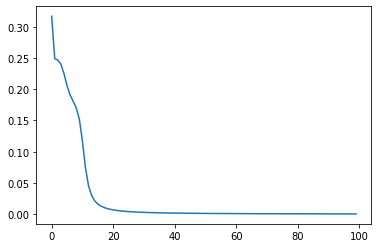

In [188]:

import matplotlib.pyplot as plt 
plt.plot(ds)

### nn 모델을 사용

위의 방법과 달리 nn모델을 사용하면 위의 복잡한 웨이트 초기화와 계산과정은 다 자동화된다. 단지 다음과 같이 모델을 구성할때 2개의 층만 더 추가해주면 된다. 
```
model = nn.Sequential(
     nn.Linear(2,2),
     nn.Sigmoid(),
     nn.Linear(2,1),
     nn.Sigmoid()
)

```
이를 이용한 웨이트와 바이어스 생성, 출력 계산등은 다 자동화 되므로 사실상 이 부분을 제외하면 나머지는 단층 신경망과 동일하다.


In [189]:
model = nn.Sequential(
     nn.Linear(2,2),
     nn.Sigmoid(),
     nn.Linear(2,1),
     nn.Sigmoid()
)
 

optimizer = optim.SGD(model.parameters(), lr = 1)
 
ds = []
for step in range(10000):
  o = model(x)

  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 


  if step % 100 == 0 :
    ds += [d.item()]
    print("err:", d.item())


print( np.round(o.detach().numpy(), 3) )




err: 0.26125481724739075
err: 0.24957376718521118
err: 0.24914570152759552
err: 0.248040571808815
err: 0.24459823966026306
err: 0.23366297781467438
err: 0.21155884861946106
err: 0.18704096972942352
err: 0.14411164820194244
err: 0.06783607602119446
err: 0.030713152140378952
err: 0.017709234729409218
err: 0.011953971348702908
err: 0.008859161287546158
err: 0.006968081463128328
err: 0.005707951728254557
err: 0.004814734682440758
err: 0.004151804838329554
err: 0.0036420286633074284
err: 0.003238857723772526
err: 0.00291265151463449
err: 0.0026436815969645977
err: 0.0024183797650039196
err: 0.0022270968183875084
err: 0.0020627963822335005
err: 0.0019202433759346604
err: 0.0017954586073756218
err: 0.0016853694105520844
err: 0.0015875614481046796
err: 0.0015001248102635145
err: 0.0014215154806151986
err: 0.001350484904833138
err: 0.0012859979178756475
err: 0.00122720783110708
err: 0.0011733982246369123
err: 0.0011239750310778618
err: 0.00107842858415097
err: 0.001036326284520328
err: 0.000997

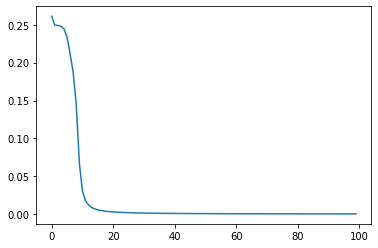

In [190]:

import matplotlib.pyplot as plt 
plt.plot(ds)